# Global Energy Budget

Let's read a netcdf file that include information on global energy budget. <br>
First, let's import modules that we will be using.

In [1]:
import matplotlib.pyplot as plt # a module necessary to make a plot
from netCDF4 import Dataset
import numpy as np
import cartopy.crs as ccrs

Open and read the outgoing longwave radiation (OLR) file 'olr_mean_regrid.nc'. This file can be downloaded from Canvas/files/python.

In [2]:
filename='olr_mean_regrid.nc'   # name of the file
print(filename)
# read data
f1=Dataset(filename,'a')
print (f1.variables.keys())

/Users/jungeunl/Cycad/class/data/olr_mean_regrid.nc
odict_keys(['LON', 'LAT', 'TIME', 'TIME_bnds', 'OLR2'])


In [6]:
olr=f1.variables['OLR2'][:]
lat=f1.variables['LAT'][:]
lon=f1.variables['LON'][:]
print(olr.shape)

(12, 36, 72)


Let's calculate annual average.

In [7]:
olra=np.mean(olr,axis=0)
print(olra.shape)

(36, 72)


Plot OLR.

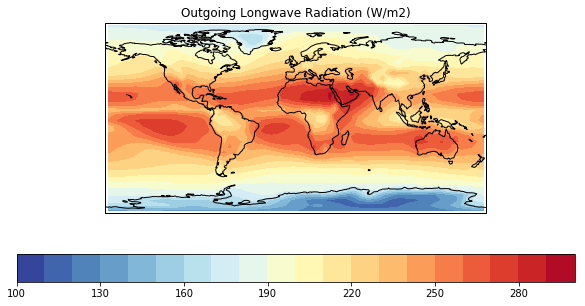

In [8]:
# Make a plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# color map
cmap1=plt.cm.RdYlBu_r

# set contour levels
levels = np.arange(100,310,10)

# for mon in range(nmon):
cs=ax.contourf(lon,lat,olra,levels,transform=ccrs.PlateCarree(),cmap=cmap1)
plt.title('Outgoing Longwave Radiation (W/m2)') #title
plt.colorbar(cs, orientation='horizontal') # color map

# draw the coastline
ax.coastlines()
ax.set_global()

plt.show()

Plot incoming shortwave radiation. Let's first read the file 'toa_sw.nc' <br>
(Hint) You have to read tsr, tisr, latitude, and longitude variables. Assign the file with a different name (e.g. f2) and latitude and longitude variables.
> f2=Dataset(filename,'a') <br>
> swn=f2.variables['tsr'][:]   # TOA net solar radiation <br>
> swd=f2.variables['tisr'][:]   # TOA incident solar radiation <br>
> lat2=f2.variables['latitude'][:] <br>
> lon2=f2.variables['longitude'][:] <br>


#### Exercise
Calculate the annual average of swn and swd.

#### Exercise
Make a map of TOA net solar radiation

#### Zonal average
Let's Calculate the zonal average (average along the x-axis)

In [34]:
olr_lat=np.mean(olra,axis=1)
print(olr_lat.shape)

(36,)


Make a plot.

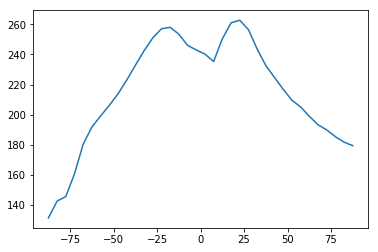

In [35]:
plt.plot(lat1,olr_lat)

#### Exercise
Calculate and plot the zonal average of net shortwave radiation.